In [1]:
import json

with open('result.json', 'r') as file:
    data = json.load(file)

print(data)


{'wp2': {'partitions_found': 299, 'time_elapsed': 214.0416440963745}, 'wp3': [{'invariant_config': [[0, 'vertex_count_invariant'], [1, 'edge_count_invariant'], [2, 'own_weisfeiler_leman_convergence_invariant']], 'partition_development': [{'number_of_partitions': 12, 'time_elapsed_by_this_invariant': 3.8992114067077637}, {'number_of_partitions': 31, 'time_elapsed_by_this_invariant': 5.732218265533447}, {'number_of_partitions': 265, 'time_elapsed_by_this_invariant': 69.82465863227844}], 'prefiltering_elapsed_time': 79.45608830451965, 'complete_elapsed_time': 112.6637978553772, 'partitions_found': 299}, {'invariant_config': [[0, 'vertex_count_invariant']], 'partition_development': [{'number_of_partitions': 12, 'time_elapsed_by_this_invariant': 3.8951244354248047}], 'prefiltering_elapsed_time': 3.8951244354248047, 'complete_elapsed_time': 193.1996874809265, 'partitions_found': 299}, {'invariant_config': [[0, 'vertex_count_invariant'], [1, 'own_weisfeiler_leman_convergence_invariant']], 'pa

# check that all procedures find the same number of clusters

In [3]:
wp2_found_partitions = data["wp2"]["partitions_found"]

wp3_found_partitions = [run["partitions_found"] for run in data["wp3"]]

for found in wp3_found_partitions:
    assert found == wp2_found_partitions

# visualization by total run time

In [4]:
total_run_time_comparison_wp2 = ("wp2-base", data["wp2"]["time_elapsed"])
total_run_time_comparison_wp3 = [(f"wp3-{index}", run["complete_elapsed_time"]) for index, run in enumerate(data["wp3"])]

plot_data = [total_run_time_comparison_wp2] + total_run_time_comparison_wp3 

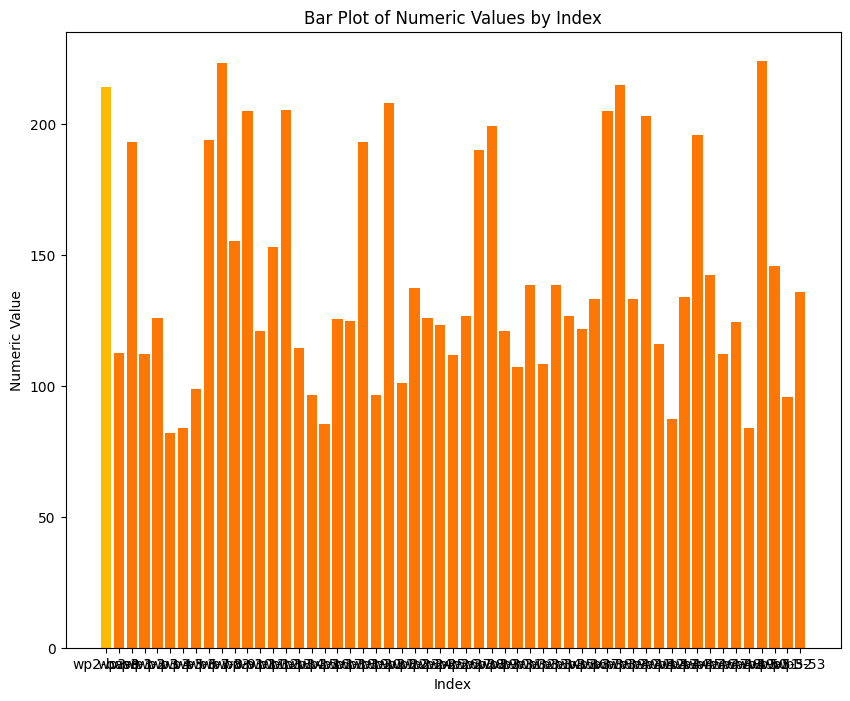

In [5]:
import matplotlib.pyplot as plt

# Separate the plot_data into two lists: indices and values
indices, values = zip(*plot_data)

colors = ['#fcba03' if 'wp2' in idx else '#fc7703' if 'wp3' in idx else '#fc2003' for idx in indices]
plt.figure(figsize=(10, 8))
# Create the bar plot
plt.bar(indices, values, color=colors)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Numeric Value')
plt.title('Bar Plot of Numeric Values by Index')

# Show the plot
plt.show()


# Filter fastest configurations

In [11]:
fastest_complete_runtime_configs = sorted(data["wp3"], key=lambda x: x["complete_elapsed_time"])[0:3]

for config in fastest_complete_runtime_configs:
    print(config["complete_elapsed_time"], config["invariant_config"])

81.97979784011841 [[0, 'vertex_count_invariant'], [1, 'own_weisfeiler_leman_one_iteration_invariant']]
83.8308174610138 [[0, 'vertex_degree_invariant'], [1, 'own_weisfeiler_leman_one_iteration_invariant']]
83.86069774627686 [[0, 'vertex_count_invariant'], [1, 'edge_count_invariant'], [2, 'own_weisfeiler_leman_one_iteration_invariant']]


# visualization by invariant config